In [17]:
#pip install bert-for-tf2

In [18]:
#pip install sentencepiece

In [19]:
#pip install keras

In [20]:
#pip install --upgrade --force-reinstall tensorflow-estimator==1.15.1

In [21]:
#pip install keras

In [22]:
pip install tensorflow==2.4.0

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [23]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

In [24]:
import pandas as pd
import re
import numpy as np
import random
import math

In [25]:
data = pd.read_csv('tatarstan_message_2.csv', sep = ',')
print(data.columns)
data = data[['categories', 'description_stem']]
data.head(3)

Index(['level_0', 'index', 'categories', 'description', 'worker',
       'description_prep', 'num_words', 'description_stem'],
      dtype='object')


,categories,description_stem
0,Благоустройство территории,трасса нижнекамск чистополь лесополоса пгт кам...
1,Благоустройство территории,двор дом ленинградский отсутствовать парковочн...
2,Содержание и ремонт муниципальных дорог,добрый день осуществляться уборка снег центр г...


In [26]:
X = [x for x in data['description_stem']]
Y = pd.get_dummies(data['categories'])
#Y = np.argmax(np.array(Y), axis = 1)
#Y =  data.categories.replace(data.categories.unique(), range(data.categories.unique().shape[0]), inplace=False) 
print(Y)
#print(data.categories.unique().shape[0])

       Cвалки  Бездомные животные  Благоустройство территории  Вода  Воздух  \
0           0                   0                           1     0       0   
1           0                   0                           1     0       0   
2           0                   0                           0     0       0   
3           0                   0                           1     0       0   
4           0                   0                           0     0       0   
...       ...                 ...                         ...   ...     ...   
23665       0                   0                           0     0       0   
23666       0                   0                           1     0       0   
23667       1                   0                           0     0       0   
23668       0                   0                           1     0       0   
23669       0                   0                           1     0       0   

       Детские сады  Доступная среда  Жилищное стро

In [27]:
data.categories.unique()

array(['Благоустройство территории',
       'Содержание и ремонт муниципальных дорог',
       'Поликлиники и больницы', 'Бездомные животные', 'Парки и скверы',
       'Мобильная связь', 'Организация дорожного движения',
       'Незаконные азартные игры', 'Санитарное состояние',
       'Нарушение в наружной рекламе', 'Работа спортивных объектов',
       'Капитальный ремонт', 'Общественный транспорт', 'Воздух',
       'Садоводческие, огороднические и дачные некоммерческие объединения',
       'Детские сады', 'Доступная среда', 'Жилищное строительство',
       'Почта', 'Вода',
       'Содержание и ремонт федеральных и республиканских дорог',
       'Cвалки', 'Работа учреждений культуры',
       'Объекты культурного наследия', 'Сельское хозяйство',
       'Цифровое телевидение'], dtype=object)

In [28]:
tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file="bert_model/vocab.txt",
     do_lower_case=True)
bert_layer = hub.KerasLayer("/notebooks/bert_model",
                            trainable=False, signature='tokens' , signature_outputs_as_dict=True)
#vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
#to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
#tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [29]:
tokenizer.tokenize("don't be so judgmental")

['don', "'", 't', 'be', 'so', 'j', '##ud', '##g', '##ment', '##al']

In [30]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("dont be so judgmental"))

[53106, 443, 11018, 27126, 263, 9037, 474, 12947, 1672]

In [31]:
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [32]:
tokenized_reviews = [tokenize_reviews(str(review)) for review in X]

In [33]:
print(tokenized_reviews[0])

[30914, 70528, 2059, 932, 5850, 4659, 107394, 754, 58791, 3511, 727, 378, 87244, 11243, 732, 378, 5866, 39740, 378, 58087, 673, 73507, 816, 12737, 65511, 726, 1165, 27183, 87197, 13544, 58619]


In [34]:
from keras.preprocessing.sequence import pad_sequences
SENTENCE_LENGTH = 50

tokenized_reviews = pad_sequences(tokenized_reviews, maxlen=SENTENCE_LENGTH)
reviews_with_len = [[review, Y.iloc[i]]
                 for i, review in enumerate(tokenized_reviews)]

In [35]:
print(reviews_with_len[0])

[array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,  30914,  70528,   2059,    932,   5850,
         4659, 107394,    754,  58791,   3511,    727,    378,  87244,
        11243,    732,    378,   5866,  39740,    378,  58087,    673,
        73507,    816,  12737,  65511,    726,   1165,  27183,  87197,
        13544,  58619], dtype=int32), Cвалки                                                               0
Бездомные животные                                                   0
Благоустройство территории                                           1
Вода                                                                 0
Воздух                                                               0
Детские сады                                                         0
Доступная среда                                                      0
Жилищное строительство                

In [36]:
random.shuffle(reviews_with_len)

In [37]:
from sklearn.model_selection import train_test_split

X = np.array([part[0] for part in reviews_with_len])
Y = np.array([part[1] for part in reviews_with_len])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
# Метрики 
from sklearn.metrics import matthews_corrcoef
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))



In [41]:
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.layers import Dense, concatenate, Activation, Dropout, LSTM
from keras.models import Model
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import GlobalMaxPooling1D

SENTENCE_LENGTH = 50
NUM = len(tokenizer.vocab)
DIM = 256

_input = Input(shape=(SENTENCE_LENGTH,), dtype='int32')
_encoder = Embedding(NUM, DIM, input_length=SENTENCE_LENGTH)(_input)
layer = LSTM(300)(_encoder)
layer = Dense(300,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(26,name='out_layer')(layer)
layer = Activation('softmax')(layer)
model = Model(_input,outputs=layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 256)           30755328  
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               668400    
_________________________________________________________________
FC1 (Dense)                  (None, 300)               90300     
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
out_layer (Dense)            (None, 26)                7826

In [43]:
from keras.callbacks import ModelCheckpoint
from keras import backend as K 
checkpoint = ModelCheckpoint(r"lstm_bert_weights/CNN_Bert_classifier_512-{epoch:02d}-{val_f1:.2f}.hdf5", # Сохраняем модель с лучшим val_f1
                             monitor='val_f1', save_best_only=True, mode='max')
history = model.fit(X_train, Y_train, batch_size=512, epochs=100, validation_split=0.2, callbacks = [checkpoint])

Epoch 1/100
30/30 [==============================] - 14s 323ms/step - loss: 0.4063 - accuracy: 0.1965 - precision: 0.1765 - recall: 0.0968 - f1: 0.1186 - val_loss: 0.0994 - val_accuracy: 0.4562 - val_precision: 0.4547 - val_recall: 0.4547 - val_f1: 0.4547
Epoch 2/100
30/30 [==============================] - 9s 302ms/step - loss: 0.1120 - accuracy: 0.4211 - precision: 0.4448 - recall: 0.2705 - f1: 0.3357 - val_loss: 0.0986 - val_accuracy: 0.4562 - val_precision: 0.4547 - val_recall: 0.4547 - val_f1: 0.4547
Epoch 3/100
30/30 [==============================] - 9s 298ms/step - loss: 0.1052 - accuracy: 0.4494 - precision: 0.4686 - recall: 0.3176 - f1: 0.3771 - val_loss: 0.0968 - val_accuracy: 0.4562 - val_precision: 0.4547 - val_recall: 0.4547 - val_f1: 0.4547
Epoch 4/100
30/30 [==============================] - 9s 303ms/step - loss: 0.1011 - accuracy: 0.4571 - precision: 0.4882 - recall: 0.3260 - f1: 0.3895 - val_loss: 0.0930 - val_accuracy: 0.4776 - val_precision: 0.5041 - val_recall: 0.4

Epoch 33/100
30/30 [==============================] - 9s 307ms/step - loss: 0.0098 - accuracy: 0.9630 - precision: 0.9782 - recall: 0.9522 - f1: 0.9650 - val_loss: 0.0837 - val_accuracy: 0.7666 - val_precision: 0.7891 - val_recall: 0.7617 - val_f1: 0.7751
Epoch 34/100
30/30 [==============================] - 9s 308ms/step - loss: 0.0091 - accuracy: 0.9639 - precision: 0.9756 - recall: 0.9562 - f1: 0.9658 - val_loss: 0.0792 - val_accuracy: 0.7804 - val_precision: 0.8003 - val_recall: 0.7735 - val_f1: 0.7866
Epoch 35/100
30/30 [==============================] - 9s 311ms/step - loss: 0.0087 - accuracy: 0.9674 - precision: 0.9783 - recall: 0.9598 - f1: 0.9690 - val_loss: 0.0809 - val_accuracy: 0.7732 - val_precision: 0.7930 - val_recall: 0.7682 - val_f1: 0.7804
Epoch 36/100
30/30 [==============================] - 9s 305ms/step - loss: 0.0073 - accuracy: 0.9746 - precision: 0.9827 - recall: 0.9699 - f1: 0.9762 - val_loss: 0.0796 - val_accuracy: 0.7753 - val_precision: 0.7940 - val_recall: 

Epoch 65/100
30/30 [==============================] - 9s 305ms/step - loss: 0.0019 - accuracy: 0.9931 - precision: 0.9939 - recall: 0.9915 - f1: 0.9927 - val_loss: 0.1263 - val_accuracy: 0.7606 - val_precision: 0.7715 - val_recall: 0.7606 - val_f1: 0.7660
Epoch 66/100
30/30 [==============================] - 9s 308ms/step - loss: 0.0021 - accuracy: 0.9916 - precision: 0.9923 - recall: 0.9911 - f1: 0.9917 - val_loss: 0.1300 - val_accuracy: 0.7650 - val_precision: 0.7749 - val_recall: 0.7654 - val_f1: 0.7701
Epoch 67/100
30/30 [==============================] - 9s 308ms/step - loss: 0.0024 - accuracy: 0.9916 - precision: 0.9930 - recall: 0.9903 - f1: 0.9917 - val_loss: 0.1289 - val_accuracy: 0.7621 - val_precision: 0.7732 - val_recall: 0.7630 - val_f1: 0.7680
Epoch 68/100
30/30 [==============================] - 9s 308ms/step - loss: 0.0016 - accuracy: 0.9952 - precision: 0.9957 - recall: 0.9942 - f1: 0.9949 - val_loss: 0.1346 - val_accuracy: 0.7627 - val_precision: 0.7708 - val_recall: 

30/30 [==============================] - 9s 306ms/step - loss: 0.0012 - accuracy: 0.9954 - precision: 0.9955 - recall: 0.9953 - f1: 0.9954 - val_loss: 0.1605 - val_accuracy: 0.7555 - val_precision: 0.7608 - val_recall: 0.7538 - val_f1: 0.7573
Epoch 98/100
30/30 [==============================] - 9s 312ms/step - loss: 0.0033 - accuracy: 0.9886 - precision: 0.9889 - recall: 0.9883 - f1: 0.9886 - val_loss: 0.1349 - val_accuracy: 0.7709 - val_precision: 0.7744 - val_recall: 0.7683 - val_f1: 0.7713
Epoch 99/100
30/30 [==============================] - 9s 306ms/step - loss: 0.0018 - accuracy: 0.9928 - precision: 0.9932 - recall: 0.9923 - f1: 0.9927 - val_loss: 0.1363 - val_accuracy: 0.7629 - val_precision: 0.7688 - val_recall: 0.7627 - val_f1: 0.7657
Epoch 100/100
30/30 [==============================] - 9s 310ms/step - loss: 0.0013 - accuracy: 0.9951 - precision: 0.9957 - recall: 0.9943 - f1: 0.9950 - val_loss: 0.1483 - val_accuracy: 0.7629 - val_precision: 0.7689 - val_recall: 0.7634 - val

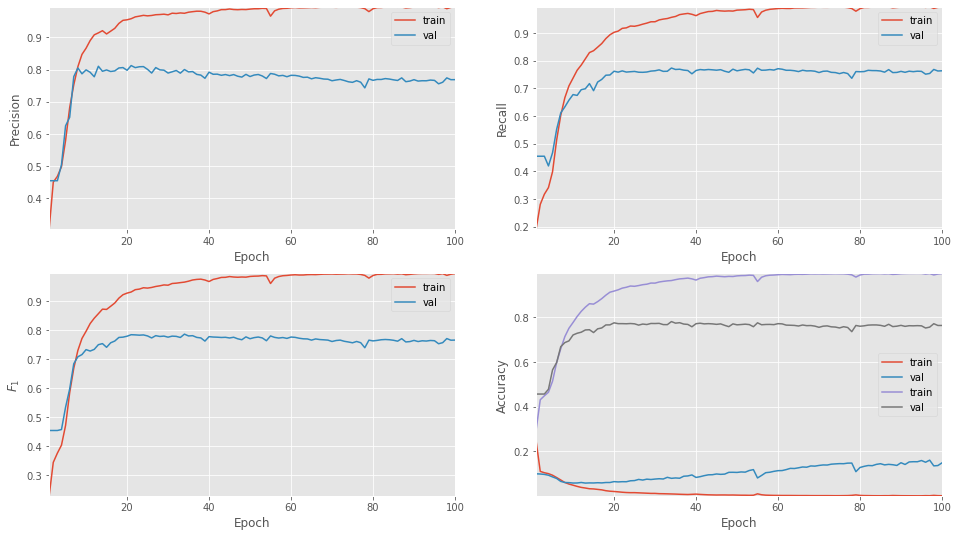

In [44]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')


def plot_metrix(ax, x1, x2, title):
    ax.plot(range(1, len(x1) + 1), x1, label='train')
    ax.plot(range(1, len(x2) + 1), x2, label='val')
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.margins(0)


def plot_history(history):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))
    ax1, ax2, ax3, ax4 = axes.ravel()

    plot_metrix(ax1, history.history['precision'], history.history['val_precision'], 'Precision')
    plot_metrix(ax2, history.history['recall'], history.history['val_recall'], 'Recall')
    plot_metrix(ax3, history.history['f1'], history.history['val_f1'], "$F_1$")
    plot_metrix(ax4, history.history['loss'], history.history['val_loss'], 'Loss')
    plot_metrix(ax4, history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')

    plt.show()

plot_history(history)

In [49]:
model.load_weights('lstm_bert_weights/CNN_Bert_classifier_512-34-0.79.hdf5')

from sklearn.metrics import classification_report
print("Оценки тестового набора:")
predicted = np.array(model.predict(X_test))
predicted = np.argmax(predicted, axis=1)
Y_test = np.argmax(np.array(Y_test), axis=1)
print(classification_report(Y_test, predicted, digits=3))
print(matthews_corrcoef(Y_test, predicted))

Оценки тестового набора:
              precision    recall  f1-score   support

           0      0.524     0.478     0.500        69
           1      0.959     0.906     0.932       128
           2      0.790     0.810     0.800      2112
           3      0.000     0.000     0.000         3
           4      0.429     0.462     0.444        26
           5      0.375     0.222     0.279        27
           6      0.167     0.125     0.143        16
           7      0.000     0.000     0.000         4
           8      0.190     0.143     0.163        28
           9      0.923     0.923     0.923        39
          10      0.919     0.876     0.897       194
          11      0.000     0.000     0.000         1
          12      0.766     0.708     0.736       171
          14      0.786     0.841     0.813       353
          15      0.231     0.286     0.255        84
          16      0.867     0.787     0.825       108
          17      0.111     0.200     0.143         5
  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
